In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the CSV path
CSV_PATH = 'D:\\Softwarica\\Thesis File\\Advanced_medical_healthcare_recommendation\\data\\raw\\'

# Load the cleaned data for 2013
df = pd.read_csv(CSV_PATH + 'cleaned_ED2013.csv')

# Display the first few rows of the data
print(df.head())


   Age  AgeRecode  Sex  Ethnicity  Race  Temperature  HeartRate  \
0   46          4    2          1     1          974        998   
1   56          4    2          1     1          982        998   
2   37          3    2          1     1          986        998   
3    7          1    1          1     1          996        998   
4   53          4    1          1     1          982        998   

   RespiratoryRate  SystolicBP  DiastolicBP  ...  DrugCategory1_2  \
0               18         156           97  ...            129.0   
1               18         146           89  ...            129.0   
2               19         110           80  ...            129.0   
3               22         109           77  ...            129.0   
4               20         136           90  ...            129.0   

   DrugCategoryLevel1_1  DrugCategoryLevel1_2  DrugID2  PrescriptionStatus2  \
0                  57.0                 122.0   d00019                  5.0   
1                  57.0 

In [5]:
# Display basic information about the data
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24777 entries, 0 to 24776
Data columns (total 81 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           24777 non-null  int64  
 1   AgeRecode                     24777 non-null  int64  
 2   Sex                           24777 non-null  int64  
 3   Ethnicity                     24777 non-null  int64  
 4   Race                          24777 non-null  int64  
 5   Temperature                   24777 non-null  int64  
 6   HeartRate                     24777 non-null  int64  
 7   RespiratoryRate               24777 non-null  int64  
 8   SystolicBP                    24777 non-null  int64  
 9   DiastolicBP                   24777 non-null  int64  
 10  Immediacy                     24777 non-null  int64  
 11  PainScale                     24777 non-null  int64  
 12  Injury                        24777 non-null  int64  
 13  I

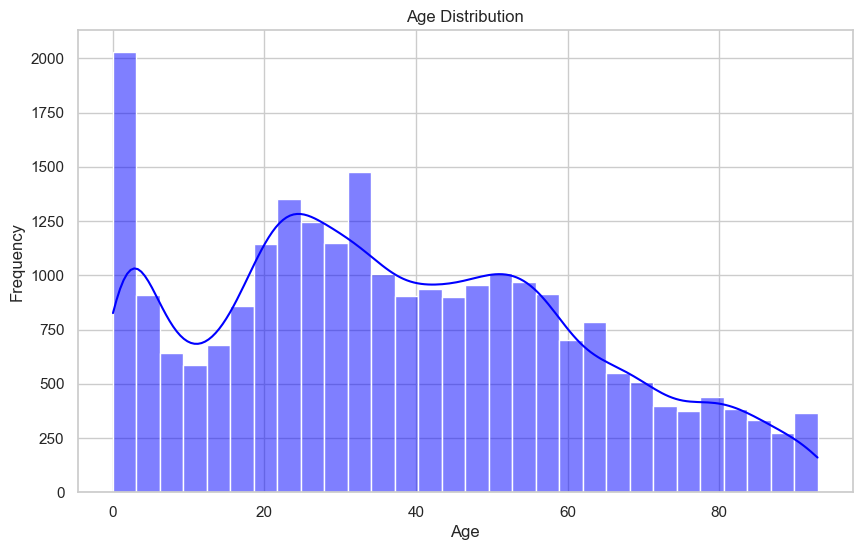

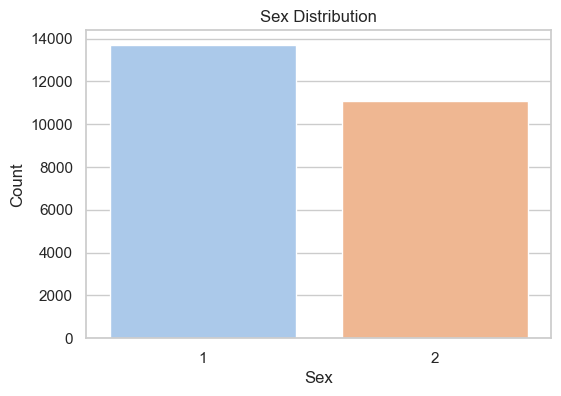

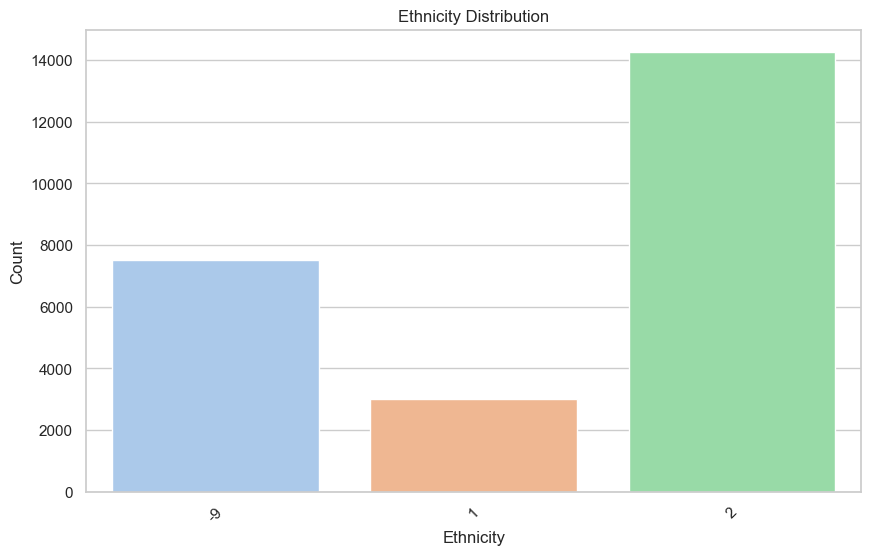

In [4]:
# Set the aesthetic style for the plots
sns.set(style="whitegrid")

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Sex Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df, palette='pastel')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Ethnicity Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Ethnicity', data=df, palette='pastel')
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\rakxi\AppData\Local\Temp\ipykernel_23652\2314496742.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


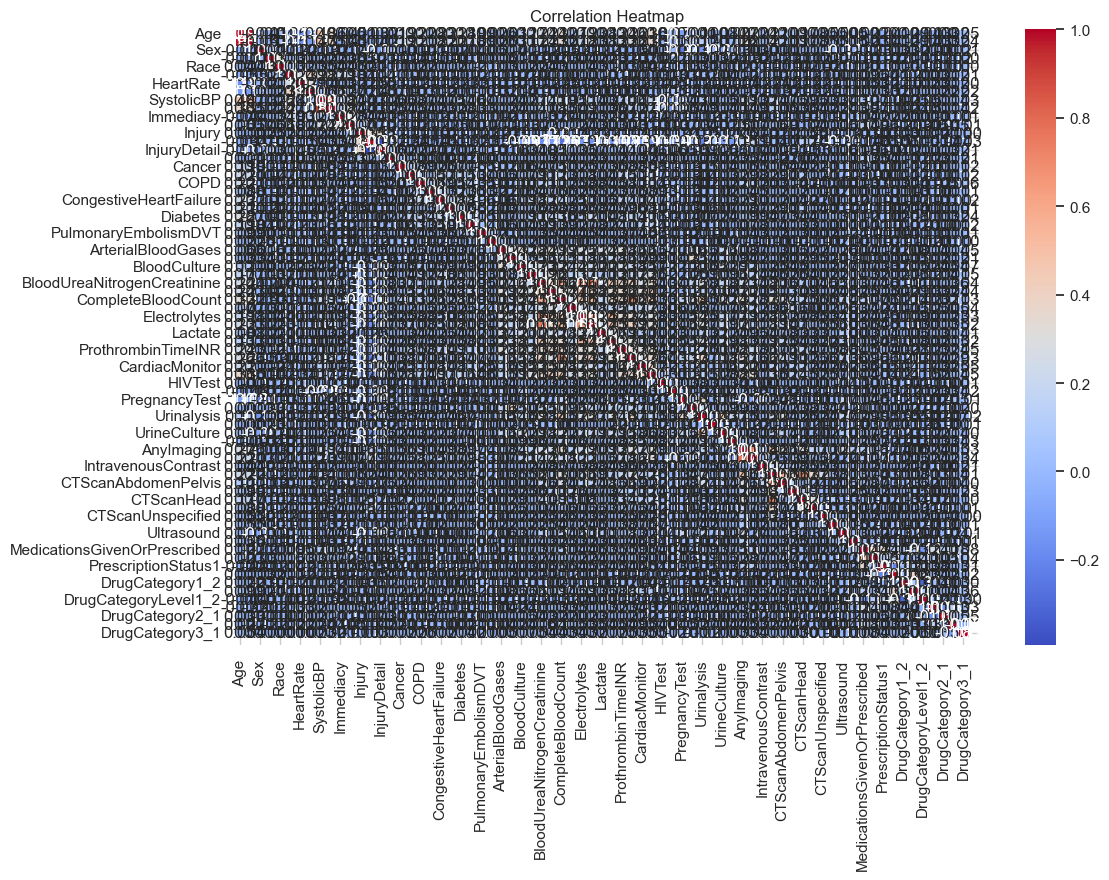

In [5]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



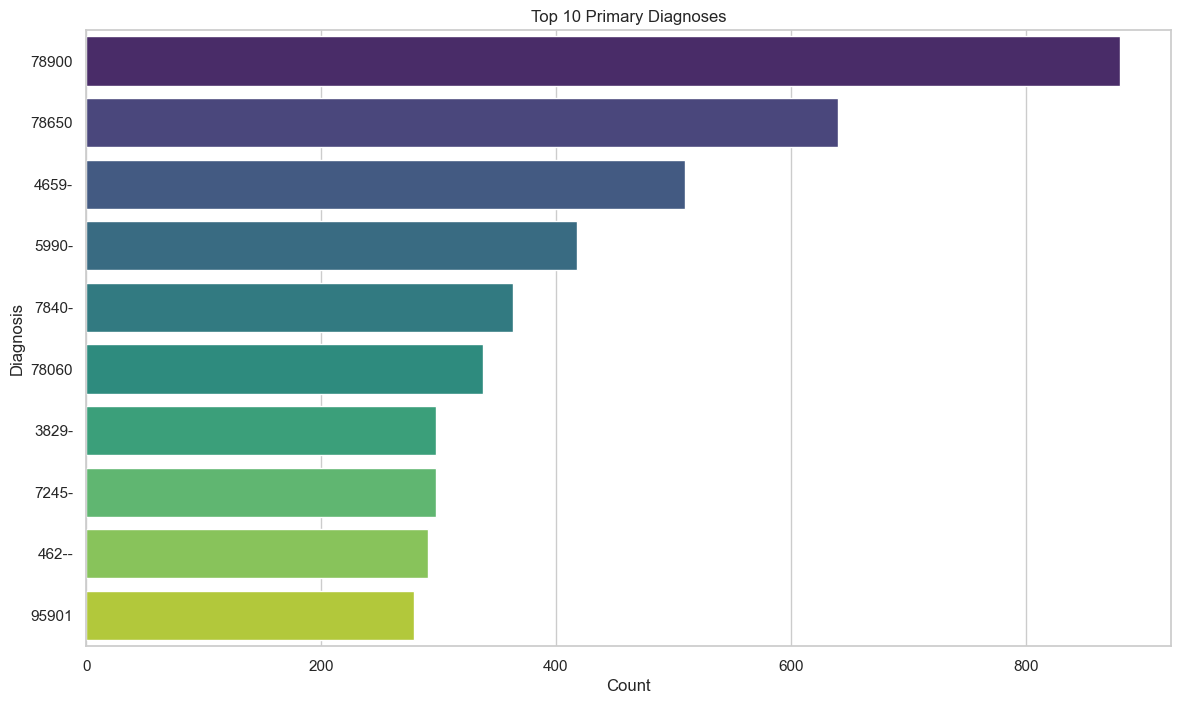

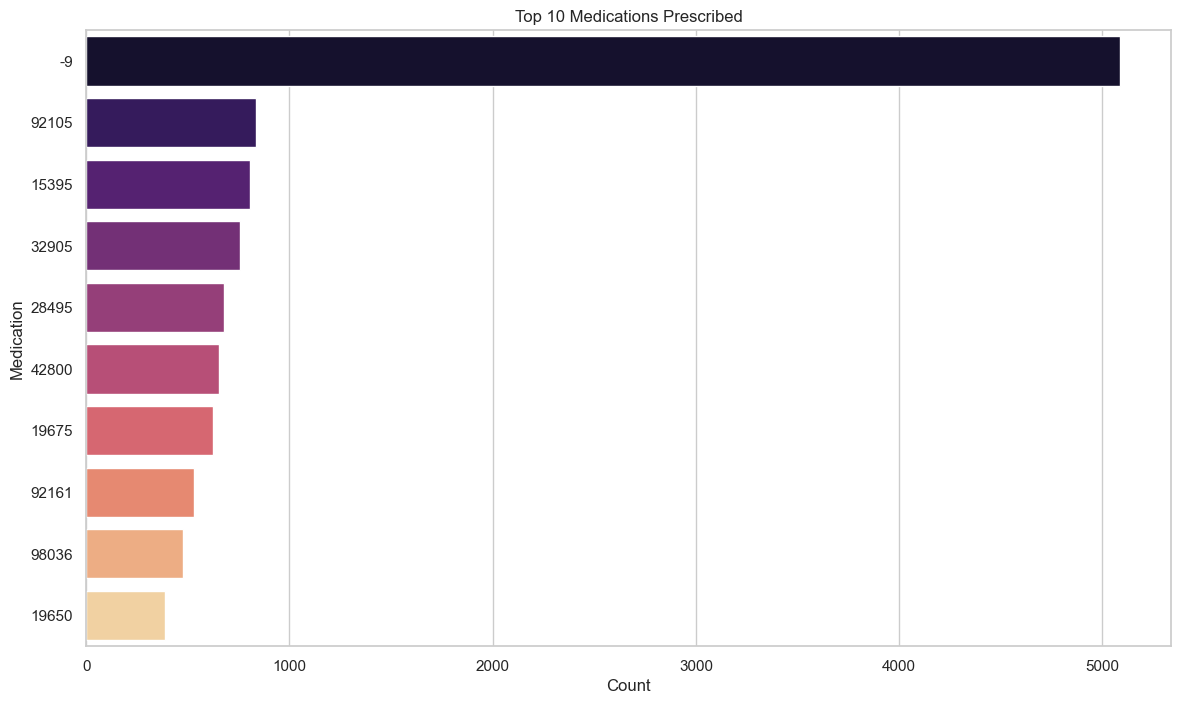

In [6]:
# Most common primary diagnoses
plt.figure(figsize=(14, 8))
sns.countplot(y='Diagnosis1', data=df, order=df['Diagnosis1'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Primary Diagnoses')
plt.xlabel('Count')
plt.ylabel('Diagnosis')
plt.show()

# Most prescribed medications
plt.figure(figsize=(14, 8))
sns.countplot(y='Medication1', data=df, order=df['Medication1'].value_counts().index[:10], palette='magma')
plt.title('Top 10 Medications Prescribed')
plt.xlabel('Count')
plt.ylabel('Medication')
plt.show()



In [6]:
# Check the first few rows to confirm that Diagnosis1 and Medication1 columns exist and have data
print(df[['Diagnosis1', 'Medication1']].head())

# Check for any missing or NaN values in these columns
print(df[['Diagnosis1', 'Medication1']].isna().sum())


df = df.dropna(subset=['Diagnosis1', 'Medication1'])


  Diagnosis1  Medication1
0      71946        89020
1      72633        92116
2      7851-           -9
3      0340-        23228
4      29532           -9
Diagnosis1     0
Medication1    0
dtype: int64


In [7]:
# Model Development and Training


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the cleaned data
CSV_PATH = 'D:\\Softwarica\\Thesis File\\Advanced_medical_healthcare_recommendation\\data\\raw\\'
df = pd.read_csv(CSV_PATH + 'cleaned_ED2013.csv')

# Separate features and target variables
X = df.drop(['Diagnosis1', 'Medication1'], axis=1)  # Replace with your actual target columns
y_diagnosis = df['Diagnosis1']  # Target for diagnosis prediction
y_medication = df['Medication1']  # Target for medication recommendation

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Normalize numerical data
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical data
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split data into training and testing sets for diagnosis prediction
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X, y_diagnosis, test_size=0.2, random_state=42)

# Split data into training and testing sets for medication recommendation
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, y_medication, test_size=0.2, random_state=42)

# Apply the preprocessing pipeline to the data
X_train_d = preprocessor.fit_transform(X_train_d)
X_test_d = preprocessor.transform(X_test_d)

X_train_m = preprocessor.fit_transform(X_train_m)
X_test_m = preprocessor.transform(X_test_m)

print('Data preprocessing complete.')


Data preprocessing complete.


In [10]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.utils import resample

# # Reduce the number of trees
# rf_model_d = RandomForestClassifier(n_estimators=50, random_state=42)

# # If memory issues persist, try using a smaller sample of the dataset
# X_train_d_sample, y_train_d_sample = resample(X_train_d, y_train_d, n_samples=5000, random_state=42)

# # Train the Random Forest model on the sample
# rf_model_d.fit(X_train_d_sample, y_train_d_sample)

# # Evaluate the model on the full test set
# y_pred_d_rf = rf_model_d.predict(X_test_d)
# print("Random Forest Diagnosis Accuracy:", accuracy_score(y_test_d, y_pred_d_rf))
# print("Random Forest Diagnosis Classification Report:\n", classification_report(y_test_d, y_pred_d_rf))



In [11]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout

# # Build a Neural Network for diagnosis prediction
# nn_model_d = Sequential()
# nn_model_d.add(Dense(128, input_dim=X_train_d.shape[1], activation='relu'))
# nn_model_d.add(Dropout(0.5))
# nn_model_d.add(Dense(64, activation='relu'))
# nn_model_d.add(Dropout(0.5))
# nn_model_d.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if target is multiclass

# nn_model_d.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# nn_model_d.fit(X_train_d, y_train_d, epochs=10, batch_size=32, validation_split=0.2)

# # Evaluate the Neural Network for diagnosis
# nn_eval_d = nn_model_d.evaluate(X_test_d, y_test_d)
# print("Neural Network Diagnosis Accuracy:", nn_eval_d[1])

# # Build a Neural Network for medication recommendation
# nn_model_m = Sequential()
# nn_model_m.add(Dense(128, input_dim=X_train_m.shape[1], activation='relu'))
# nn_model_m.add(Dropout(0.5))
# nn_model_m.add(Dense(64, activation='relu'))
# nn_model_m.add(Dropout(0.5))
# nn_model_m.add(Dense(1, activation='sigmoid'))

# nn_model_m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# nn_model_m.fit(X_train_m, y_train_m, epochs=10, batch_size=32, validation_split=0.2)

# # Evaluate the Neural Network for medication
# nn_eval_m = nn_model_m.evaluate(X_test_m, y_test_m)
# print("Neural Network Medication Accuracy:", nn_eval_m[1])


In [12]:
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# # Reshape data for CNN (e.g., sequences or 1D signals)
# X_train_d_cnn = X_train_d.reshape(X_train_d.shape[0], X_train_d.shape[1], 1)
# X_test_d_cnn = X_test_d.reshape(X_test_d.shape[0], X_test_d.shape[1], 1)

# # Build a CNN model for diagnosis prediction
# cnn_model_d = Sequential()
# cnn_model_d.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_d.shape[1], 1)))
# cnn_model_d.add(MaxPooling1D(pool_size=2))
# cnn_model_d.add(Flatten())
# cnn_model_d.add(Dense(128, activation='relu'))
# cnn_model_d.add(Dropout(0.5))
# cnn_model_d.add(Dense(1, activation='sigmoid'))

# cnn_model_d.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# cnn_model_d.fit(X_train_d_cnn, y_train_d, epochs=10, batch_size=32, validation_split=0.2)

# # Evaluate the CNN model for diagnosis
# cnn_eval_d = cnn_model_d.evaluate(X_test_d_cnn, y_test_d)
# print("CNN Diagnosis Accuracy:", cnn_eval_d[1])

# # Reshape data for medication CNN
# X_train_m_cnn = X_train_m.reshape(X_train_m.shape[0], X_train_m.shape[1], 1)
# X_test_m_cnn = X_test_m.reshape(X_test_m.shape[0], X_test_m.shape[1], 1)

# # Build a CNN model for medication recommendation
# cnn_model_m = Sequential()
# cnn_model_m.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_m.shape[1], 1)))
# cnn_model_m.add(MaxPooling1D(pool_size=2))
# cnn_model_m.add(Flatten())
# cnn_model_m.add(Dense(128, activation='relu'))
# cnn_model_m.add(Dropout(0.5))
# cnn_model_m.add(Dense(1, activation='sigmoid'))

# cnn_model_m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# cnn_model_m.fit(X_train_m_cnn, y_train_m, epochs=10, batch_size=32, validation_split=0.2)

# # Evaluate the CNN model for medication
# cnn_eval_m = cnn_model_m.evaluate(X_test_m_cnn, y_test_m)
# print("CNN Medication Accuracy:", cnn_eval_m[1])


In [13]:
# from tensorflow.keras.layers import LSTM

# # Reshape data for RNN/LSTM for diagnosis
# X_train_d_rnn = X_train_d.reshape(X_train_d.shape[0], 1, X_train_d.shape[1])
# X_test_d_rnn = X_test_d.reshape(X_test_d.shape[0], 1, X_test_d.shape[1])

# # Build an RNN model using LSTM for diagnosis prediction
# rnn_model_d = Sequential()
# rnn_model_d.add(LSTM(64, input_shape=(1, X_train_d.shape[1]), return_sequences=True))
# rnn_model_d.add(LSTM(32))
# rnn_model_d.add(Dense(1, activation='sigmoid'))

# rnn_model_d.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# rnn_model_d.fit(X_train_d_rnn, y_train_d, epochs=10, batch_size=32, validation_split=0.2)

# # Evaluate the RNN model for diagnosis
# rnn_eval_d = rnn_model_d.evaluate(X_test_d_rnn, y_test_d)
# print("RNN Diagnosis Accuracy:", rnn_eval_d[1])

# # Reshape data for medication RNN
# X_train_m_rnn = X_train_m.reshape(X_train_m.shape[0], 1, X_train_m.shape[1])
# X_test_m_rnn = X_test_m.reshape(X_test_m.shape[0], 1, X_test_m.shape[1])

# # Build an RNN model using LSTM for medication recommendation
# rnn_model_m = Sequential()
# rnn_model_m.add(LSTM(64, input_shape=(1, X_train_m.shape[1]), return_sequences=True))
# rnn_model_m.add(LSTM(32))
# rnn_model_m.add(Dense(1, activation='sigmoid'))

# rnn_model_m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# rnn_model_m.fit(X_train_m_rnn, y_train_m, epochs=10, batch_size=32, validation_split=0.2)

# # Evaluate the RNN model for medication
# rnn_eval_m = rnn_model_m.evaluate(X_test_m_rnn, y_test_m)
# print("RNN Medication Accuracy:", rnn_eval_m[1])


In [14]:
# import shap

# # SHAP values for model interpretation (Example using Random Forest for diagnosis)
# explainer_d = shap.TreeExplainer(rf_model_d)
# shap_values_d = explainer_d.shap_values(X_test_d)

# # Plot summary for SHAP values for diagnosis
# shap.summary_plot(shap_values_d, X_test_d, feature_names=X.columns)

# # SHAP values for model interpretation (Example using Random Forest for medication)
# explainer_m = shap.TreeExplainer(rf_model_m)
# shap_values_m = explainer_m.shap_values(X_test_m)

# # Plot summary for SHAP values for medication
# shap.summary_plot(shap_values_m, X_test_m, feature_names=X.columns)


In [15]:
# import joblib

# # Save the best models
# joblib.dump(rf_model_d, 'best_rf_model_diagnosis.pkl')
# joblib.dump(rf_model_m, 'best_rf_model_medication.pkl')
# joblib.dump(nn_model_d, 'best_nn_model_diagnosis.h5')
# joblib.dump(nn_model_m, 'best_nn_model_medication.h5')

# # Load and use the model for prediction
# loaded_model_d = joblib.load('best_rf_model_diagnosis.pkl')
# predictions_d = loaded_model_d.predict(X_test_d)

# loaded_model_m = joblib.load('best_rf_model_medication.pkl')
# predictions_m = loaded_model_m.predict(X_test_m)

# print("Predictions for diagnosis:", predictions_d)
# print("Predictions for medication:", predictions_m)
